In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
# Set seed for results reproducibility 
seed = 42

In [3]:
df = pd.read_csv(r"C:\Users\Gonzalo\Desktop\df_2018.csv", index_col=0)
# Drop the null rows
df = df.set_index("codigo_x").dropna()
df.head()

,dias_pag,dias_lab,sueldo,comp,asist,transp,vales_x,te_dob,te_trip,desc_Lab,...,t_ded,neto,antig,depto,puesto,label,tiempov,dist,delitos,label2
codigo_x,,,,,,,,,,,,,,,,,,,,,
7505,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.63,1008.23,468,82,0003A,sigue,11.188,24.283333,0,1
6600,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,22.60,1007.26,1187,80,1,sigue,8.079,27.766667,46,1
7515,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.53,1008.33,202,72,1,fue,8.400,21.900000,0,0
5933,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.45,1008.41,1582,51,1,sigue,3.738,10.183333,21,1
7170,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,50.12,1441.48,774,57,1,sigue,8.113,20.516667,0,1


In [4]:
df2 = pd.read_csv(r"C:\Users\Gonzalo\Desktop\df_2019.csv", index_col=0)
# Drop the null rows
df2 = df2.set_index("codigo_x").dropna()
df2.head()

,dias_pag,dias_lab,sueldo,comp,asist,transp,vales_x,te_dob,te_trip,desc_Lab,...,t_ded,neto,antig,depto,puesto,label,tiempov,dist,delitos,label2
codigo_x,,,,,,,,,,,,,,,,,,,,,
7840,7,5,1143.52,462.91,60,60,257.02,367.56,673.86,0.0,...,340.18,3011.41,39,87,185,fue,4.940,6.433333,0,0
7505,7,5,721.00,173.04,60,60,143.04,0.00,0.00,0.0,...,86.05,1777.03,520,82,0003A,fue,11.188,24.283333,0,0
6600,7,5,721.00,30.38,60,50,120.22,180.25,0.00,0.0,...,21.07,1173.91,1503,80,0002A,sigue,8.079,27.766667,46,1
7685,7,5,721.00,30.38,60,60,120.22,0.00,0.00,0.0,...,28.04,1028.65,522,5,0002A,sigue,9.926,22.383333,0,1
7331,7,5,721.00,30.38,60,60,120.22,103.00,0.00,0.0,...,24.71,1104.85,338,45,1,fue,8.901,17.116667,59,0


In [5]:
frames = [df, df2]

df_all = pd.concat(frames)
df_all.head()

,dias_pag,dias_lab,sueldo,comp,asist,transp,vales_x,te_dob,te_trip,desc_Lab,...,t_ded,neto,antig,depto,puesto,label,tiempov,dist,delitos,label2
codigo_x,,,,,,,,,,,,,,,,,,,,,
7505,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.63,1008.23,468,82,0003A,sigue,11.188,24.283333,0,1
6600,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,22.60,1007.26,1187,80,1,sigue,8.079,27.766667,46,1
7515,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.53,1008.33,202,72,1,fue,8.400,21.900000,0,0
5933,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.45,1008.41,1582,51,1,sigue,3.738,10.183333,21,1
7170,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,50.12,1441.48,774,57,1,sigue,8.113,20.516667,0,1


# Read the CSV and Perform Basic Data Cleaning

In [6]:
df_all.dropna(how='all', axis=1)
df_all.head()

,dias_pag,dias_lab,sueldo,comp,asist,transp,vales_x,te_dob,te_trip,desc_Lab,...,t_ded,neto,antig,depto,puesto,label,tiempov,dist,delitos,label2
codigo_x,,,,,,,,,,,,,,,,,,,,,
7505,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.63,1008.23,468,82,0003A,sigue,11.188,24.283333,0,1
6600,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,22.60,1007.26,1187,80,1,sigue,8.079,27.766667,46,1
7515,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.53,1008.33,202,72,1,fue,8.400,21.900000,0,0
5933,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.45,1008.41,1582,51,1,sigue,3.738,10.183333,21,1
7170,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,50.12,1441.48,774,57,1,sigue,8.113,20.516667,0,1


# Select your features (columns)

In [7]:
df_all[["otras","fonac","alim","infon","falt","enf","ISPT","IMSS","t_ded"]]*=-1
df_all["t_ded"].head()

codigo_x
7505   -21.63
6600   -22.60
7515   -21.53
5933   -21.45
7170   -50.12
Name: t_ded, dtype: float64

In [8]:
# Set features to later be used as your x values.
df_selected = df_all[['dias_lab','neto','depto', 'tiempov','dist','delitos']]

In [9]:
X = df_selected

In [10]:
y = df_all["label2"]

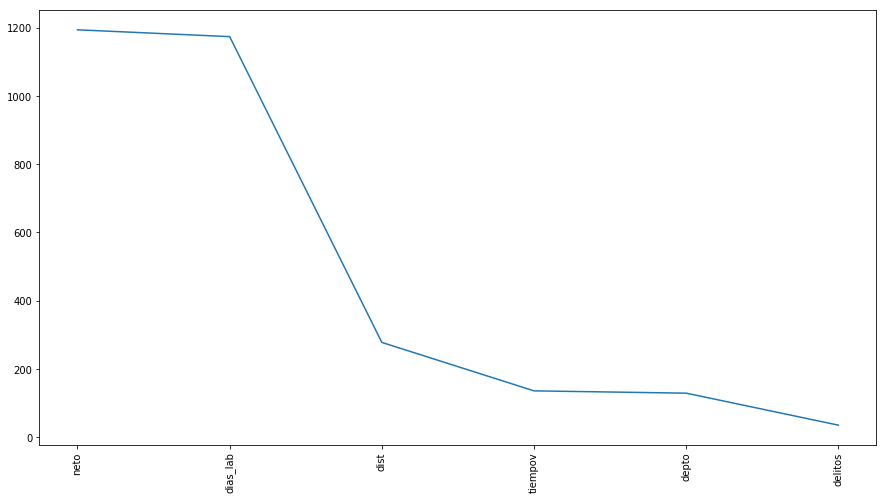

In [11]:
# Apply Univariate Feature Selection to pre-visualize feature importance
skb = SelectKBest(f_classif, k='all')
fit = skb.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
feat_scores = pd.concat([df_columns,df_scores],axis=1)
feat_scores.columns = ['Feature','Score'] 
feat_scores = feat_scores.sort_values(by=['Score'], ascending=False)

# Plot features to compare significative scores
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(feat_scores.Feature, feat_scores.Score)
plt.xticks(rotation=90)
plt.show()

# Create a Train Test Split

Use `status_bin` for the y values

In [12]:
# Select 11 features with highest score
sel_columns = feat_scores.iloc[0:8, 0].values

# Slice dataframe based on the selected features
X_featSel = X[sel_columns]

In [13]:
# Use train_test_split to create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_featSel, y, random_state=seed)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [14]:
# Scale data
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\Gonzalo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


# Train the Model



In [15]:
# fit model on training data
model = XGBClassifier()
eval_set = [(X_train_scaled, y_train)]
model.fit(X_train_scaled, y_train,eval_metric="error", eval_set=eval_set, verbose=True)


[0]	validation_0-error:0.264939
[1]	validation_0-error:0.261091
[2]	validation_0-error:0.258985
[3]	validation_0-error:0.255863
[4]	validation_0-error:0.257968
[5]	validation_0-error:0.256879
[6]	validation_0-error:0.256371
[7]	validation_0-error:0.255718
[8]	validation_0-error:0.258114
[9]	validation_0-error:0.254992
[10]	validation_0-error:0.256299
[11]	validation_0-error:0.256444
[12]	validation_0-error:0.252523
[13]	validation_0-error:0.252305
[14]	validation_0-error:0.252523
[15]	validation_0-error:0.254266
[16]	validation_0-error:0.254048
[17]	validation_0-error:0.252741
[18]	validation_0-error:0.25216
[19]	validation_0-error:0.25187
[20]	validation_0-error:0.249837
[21]	validation_0-error:0.247731
[22]	validation_0-error:0.247876
[23]	validation_0-error:0.247949
[24]	validation_0-error:0.246424
[25]	validation_0-error:0.242286
[26]	validation_0-error:0.242286
[27]	validation_0-error:0.242213
[28]	validation_0-error:0.240688
[29]	validation_0-error:0.238873
[30]	validation_0-erro

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [16]:
# make predictions for test data
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
predictions = [round(value) for value in y_pred]

In [19]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.18%


In [20]:
results = pd.DataFrame({
"prediction": y_pred,
    "actual": y_test
})

In [21]:
results.head()

,prediction,actual
codigo_x,,
7909,1,1
7914,1,1
6083,1,1
7168,1,1
4647,0,0


In [22]:
results.to_csv(r'C:\Users\Gonzalo\Desktop\ResultsXGB4.csv')

In [23]:
features_used=list(X_featSel)
print(features_used,model.feature_importances_)

['neto', 'dias_lab', 'dist', 'tiempov', 'depto', 'delitos'] [0.2651026  0.1041813  0.14236248 0.18502483 0.14055923 0.16276959]


In [24]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
neto,0.265103
tiempov,0.185025
delitos,0.162770
dist,0.142362
depto,0.140559
dias_lab,0.104181


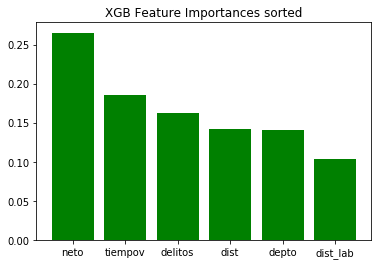

In [25]:
plt.bar(range(6), feature_importances['importance'], color="green", tick_label=['neto','tiempov','delitos','dist','depto','dist_lab'])
plt.title("XGB Feature Importances sorted")
plt.show()

In [26]:
model.evals_result()

{'validation_0': {'error': [0.264939,
   0.261091,
   0.258985,
   0.255863,
   0.257968,
   0.256879,
   0.256371,
   0.255718,
   0.258114,
   0.254992,
   0.256299,
   0.256444,
   0.252523,
   0.252305,
   0.252523,
   0.254266,
   0.254048,
   0.252741,
   0.25216,
   0.25187,
   0.249837,
   0.247731,
   0.247876,
   0.247949,
   0.246424,
   0.242286,
   0.242286,
   0.242213,
   0.240688,
   0.238873,
   0.236259,
   0.23684,
   0.236187,
   0.236114,
   0.233863,
   0.230596,
   0.230596,
   0.229943,
   0.230306,
   0.230233,
   0.229943,
   0.227692,
   0.225732,
   0.223989,
   0.223553,
   0.221738,
   0.221303,
   0.221375,
   0.221085,
   0.219705,
   0.21927,
   0.219052,
   0.2176,
   0.2176,
   0.217164,
   0.217309,
   0.21455,
   0.213752,
   0.213679,
   0.212808,
   0.212953,
   0.210266,
   0.209976,
   0.209686,
   0.209468,
   0.209686,
   0.208379,
   0.206636,
   0.206709,
   0.206128,
   0.204748,
   0.204385,
   0.204313,
   0.204022,
   0.203369,
   0.2032

In [34]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
#precision = precision_score(y_test, y_pred)
#print('Precision: %f' % precision)
# recall: tp / (tp + fn)
#recall = recall_score(y_test, y_pred)
#print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.801829
F1 score: 0.868307


In [28]:
xgb_cv = cross_val_score(model, X_train_scaled, y_train, 
                         scoring = 'neg_mean_absolute_error')

C:\Users\Gonzalo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [29]:
xgb_cv

array([-0.19272648, -0.18645175, -0.19847495])

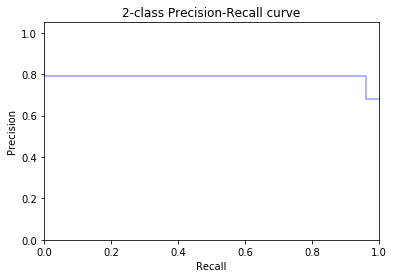

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
 
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

Threshold cutoff:  1
Max F1-score at cut-off :  0.8683068017366136


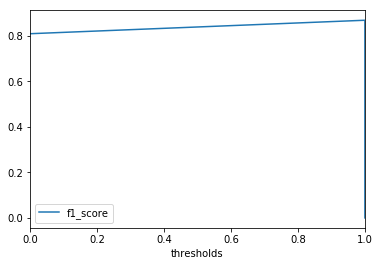

In [31]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())
scrs.plot(x='thresholds', y='f1_score')